This is Intro to AI coursework. Our model would classify and predict Salaries

Impor the libraries that is needed for our model


In [13]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

Import the csv file into pandas dataframe and remove any null values.


In [14]:
file = 'table1.csv'
sales_data = pd.read_csv(file, na_values=['NA', '?'])
df = sales_data.select_dtypes(include=['int', 'float'])
#Data Shape
print(df.shape)
#Data types
print(df.dtypes)
#Head of df
print(df.head)

(37, 8)
Year                                                    int64
Quarter                                                 int64
Median weekly earnings (in current dollars) - Total     int64
Median weekly earnings (in current dollars) - Men       int64
Median weekly earnings (in current dollars) - Women     int64
Median weekly earnings (in constant dollars) - Total    int64
Median weekly earnings (in constant dollars) - Men      int64
Median weekly earnings (in constant dollars) - Women    int64
dtype: object
<bound method NDFrame.head of     Year  ...  Median weekly earnings (in constant dollars) - Women
0   2009  ...                                                307   
1   2010  ...                                                304   
2   2010  ...                                                309   
3   2010  ...                                                308   
4   2010  ...                                                308   
5   2011  ...                               

-0.3600000000000001
   Actual  Predicted
0     306      309.0
1     306      309.0
2     304      309.0
3     300      309.0
4     314      309.0
5     314      309.0
6     302      309.0
7     302      309.0
Mean: 306.0
Root Mean Squared Error: 5.830951894845301
Accuracy: 98.2 %.
-0.3600000000000001


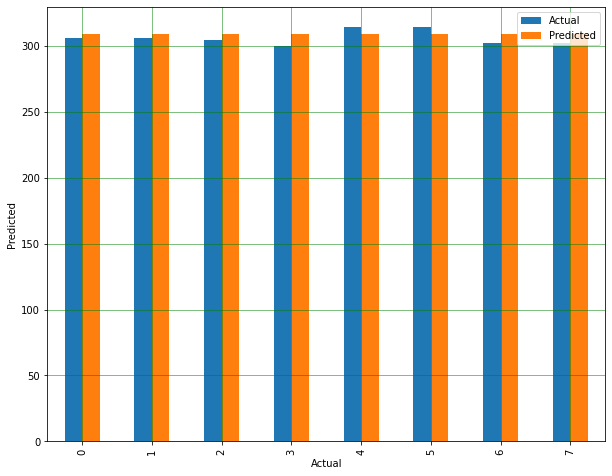

In [15]:
result = []
for x in df.columns:
    if x != 'Median weekly earnings (in constant dollars) - Women':
        result.append(x)

X = df[result].values
y = df['Median weekly earnings (in constant dollars) - Women'].values

#split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = SVR(kernel='linear', epsilon=1034,gamma=3223, C=3000).fit(X_train, y_train)

# FS_rbf_c10.00_g0.10_e0.10

Cs=gammas=epsilons=[0.1*(10**xx) for xx in range(0,3)]
kernels = ['linear','rbf']
# Cs=gammas=epsilons=[0.1*(10**xx) for xx in range(0,3)]
# kernels = ['linear','rbf']

print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)


#build a new data frame with two columns, the actual values of the test data,
#and the predictions of the model
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_head = df_compare.head(25)
print(df_head)



df_head.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

print('Mean:', np.mean(y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Performance metrics
errors = abs(y_pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
print(r2_score(y_test, y_pred))

df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
sns.regplot(x='Actual', y='Predicted', data=df_compare);
# plt.show()


# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
